In [1]:
from wavefronts import *
from recons import *
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
meters_to_ns = 1e9/c_light


### Load antenna coordinates and timings of events. Make sure to remove a time constant to avoid overflows

In [13]:
an = antenna_set('../Beacon/coord_antennas.txt')
an.coordinates -= an.coordinates.mean(axis=0)
co = coincidence_set('../Beacon/Rec_coinctable.txt',an)
#co = coincidence_set('../Beacon/Rec_coinctable_new.txt',an)

 Reading antenna positions from file ../Beacon/coord_antennas.txt
 Reading coincidence(s): index, peak time, peak amplitude from file ../Beacon/Rec_coinctable.txt


### Compute angles using PWF loss global minimizer. Compute corresponding timings

In [14]:
predicted_times = np.zeros_like(co.peak_time_array)
centered_peak_times = np.copy(co.peak_time_array)
centered_predicted_times = np.zeros_like(co.peak_time_array)

angles = np.zeros((co.ncoincs,2))
for i in range(co.ncoincs):
    centered_peak_times[i,:co.nants[i]] = co.peak_time_array[i,:co.nants[i]] - co.peak_time_array[i,:co.nants[i]].mean()
    angles[i,:] = PWF_minimize_alternate_loss(co.antenna_coords_array[i,:co.nants[i],:],co.peak_time_array[i,:co.nants[i]])
    predicted_times[i,:co.nants[i]] = PWF_model(angles[i,:],co.antenna_coords_array[i,:co.nants[i],:])
    centered_predicted_times[i,:co.nants[i]] = predicted_times[i,:co.nants[i]] - predicted_times[i,:co.nants[i]].mean()


Text(0.5, 1.0, 'Coincidence number 10')

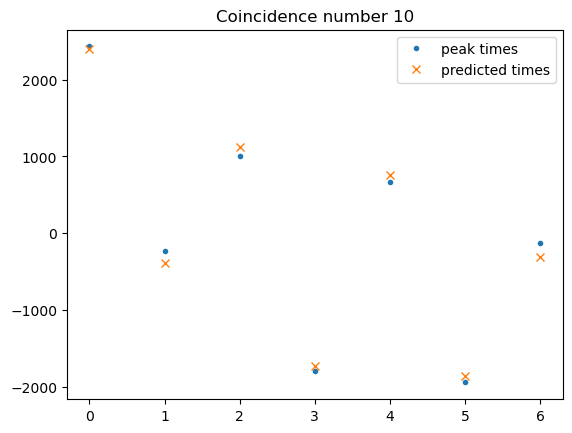

In [25]:
coinc = 10
plt.plot(meters_to_ns*centered_peak_times[coinc,:co.nants[coinc]],'.',label='peak times')
plt.plot(meters_to_ns*centered_predicted_times[coinc,:co.nants[coinc]],'x',label='predicted times')
plt.legend()
plt.title('Coincidence number %d'%coinc)

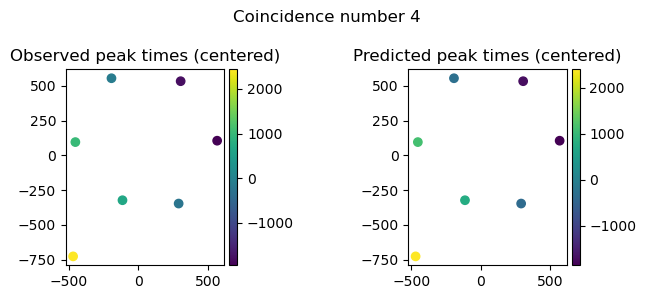

In [16]:
fig,axs = plt.subplots(1,2)
fig.set_figheight(3)
fig.set_figwidth(7)
#axs[0].set_box_aspect(1)
#axs[1].set_box_aspect(1)
pl0 = axs[0].scatter(co.antenna_coords_array[coinc,:co.nants[coinc],0],co.antenna_coords_array[coinc,:co.nants[coinc],1],c=meters_to_ns*centered_peak_times[coinc,:co.nants[coinc]])
axs[0].set_aspect('equal')
divider0 = make_axes_locatable(axs[0])
cax0 = divider0.append_axes("right", size="5%", pad=0.05)
fig.colorbar(pl0,cax=cax0)
axs[0].title.set_text('Observed peak times (centered)')

pl1 = axs[1].scatter(co.antenna_coords_array[coinc,:co.nants[coinc],0],co.antenna_coords_array[coinc,:co.nants[coinc],1],c=meters_to_ns*centered_predicted_times[coinc,:co.nants[coinc]])
axs[1].set_aspect('equal')
divider1 = make_axes_locatable(axs[1])
cax1 = divider1.append_axes("right", size="5%", pad=0.05)
fig.colorbar(pl1,cax=cax1)
axs[1].title.set_text('Predicted peak times (centered)')

fig.suptitle('Coincidence number %d'%coinc)
plt.tight_layout()


In [17]:
#angles[:,0]

Text(0.5, 1.0, 'Reconstructed beacon zenith')

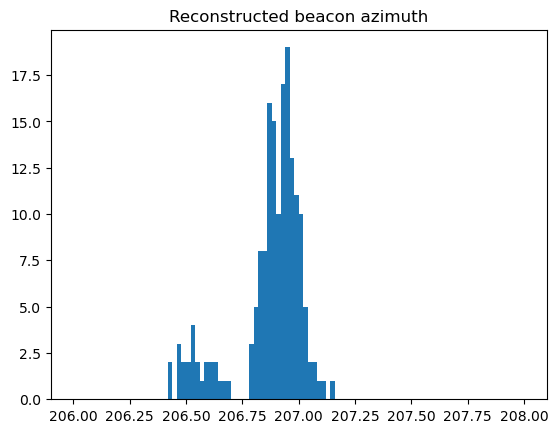

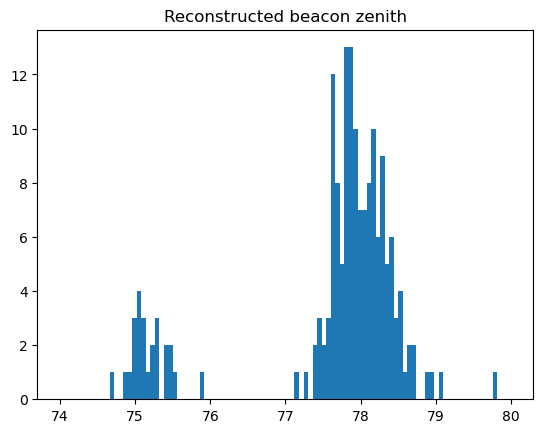

In [29]:
angles_deg = np.rad2deg(angles)
fig = plt.figure()
plt.hist(angles_deg[:,1],range=(206,208),bins=100)
plt.title('Reconstructed beacon azimuth')
fig_zen = plt.figure()
plt.hist(angles_deg[:,0],range=(74,80),bins=100)
plt.title('Reconstructed beacon zenith')